# Instagram Agent Demo

This notebook demonstrates how to use the `ig_agent` library to generate Instagram carousel posts with AI.

## 1. Setup and Installation

First, ensure you have all the necessary dependencies installed:

In [1]:
# Install dependencies if needed
!pip install langchain_xai cairosvg
!pip install -e .

Obtaining file:///Users/joseph/Desktop/ig_agent/app
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ig_agent (pyproject.toml) ... done
  Created wheel for ig_agent: filename=ig_agent-0.1.0-0.editable-py3-none-any.whl size=3273 sha256=03c27c2a3fff73581586eb5d0fdcaebb7e2a0c3c53d5eb054d6eea8198842df4
  Stored in directory: /private/var/folders/9q/25hnvn653lz4fjlr1f8kwk6r0000gn/T/pip-ephem-wheel-cache-hx0qjur7/wheels/3f/c6/80/74aa44195df52dde8decaea6604fb74c9fe6db16a494b241b2
Successfully built ig_agent
  Attempting uninstall: ig_agent
    Found existing installation: ig_agent 0.1.0
    Uninstalling ig_agent-0.1.0:
      Successfully uninstalled ig_agent-0.1.0


## 2. Basic Usage - Direct API

The simplest way to use the Instagram Agent is through its direct API, which provides methods for each step of the content generation and posting process.

In [2]:
import os
import logging
from pathlib import Path
from IPython.display import Image, display, HTML
from langchain_xai import ChatXAI
from ig_agent import InstagramAgent

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)
logger = logging.getLogger("ig_agent_demo")

In [3]:
# Create base output directory 
# Now outputs will be stored in datetime subdirectories
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

# Initialize language model
# You can use any LangChain compatible LLM here
llm = ChatXAI(model="grok-3-mini-beta")

# Initialize the Instagram agent
# Output will automatically be stored in a datetime-based directory structure
# For example: output/2025-04-20/20250420_154900/
agent = InstagramAgent(
    llm=llm,
    output_dir=output_dir,
    # Optional: provide credentials for notification and posting
    email_user=os.environ.get("EMAIL_USER"),
    email_password=os.environ.get("EMAIL_PASSWORD"),
    instagram_username=os.environ.get("INSTAGRAM_USERNAME"),
    instagram_password=os.environ.get("INSTAGRAM_PASSWORD")
)

### 2.1 Generate Content

First, we generate the content for our Instagram carousel post based on a request:

In [4]:
from datetime import datetime
today = datetime.now().strftime('%Y-%b-%d')
today

'2025-Apr-20'

In [5]:
# Generate content
request = f"Today is {today}. Generate a AI news Post pleaese. Agent especially. Just one news like new packages, new tech and etc"
content_json = agent.generate_content(request)

2025-04-20 17:43:17,416 - ig_agent - INFO - Generating content for request: Today is 2025-Apr-20. Generate a AI news Post pleaese. Agent especially. Just one news like new packages, new tech and etc
2025-04-20 17:43:24,680 - httpx - INFO - HTTP Request: POST https://api.x.ai/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-20 17:43:25,818 - primp - INFO - response: https://lite.duckduckgo.com/lite/ 200
2025-04-20 17:43:45,817 - httpx - INFO - HTTP Request: POST https://api.x.ai/v1/chat/completions "HTTP/1.1 200 OK"
2025-04-20 17:44:03,279 - httpx - INFO - HTTP Request: POST https://api.x.ai/v1/chat/completions "HTTP/1.1 200 OK"


ValidationError: 1 validation error for InstagramPost
cover.grey_box_text
  String should have at most 35 characters [type=string_too_long, input_value="OpenAI's tools are revolutionizing work!", input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/string_too_long

In [7]:
# Display the generated content structure
print(f"Cover: {content_json['cover']['heading_line1']} {content_json['cover']['heading_line2']}")
print(f"Hashtag: #{content_json['cover']['hashtag']}")
print(f"Number of content pages: {len(content_json['content_pages'])}")
print("\nContent Pages:")
for i, page in enumerate(content_json['content_pages']):
    print(f"  Page {i+1}: {page['title']} - {page['main_point']}")

print("\nCaption Preview:")
print(content_json['caption'][:200] + "...")

Cover: AI代理革命 2025新技術登場
Hashtag: #AIAgentNews
Number of content pages: 7

Content Pages:
  Page 1: AI代理是什麼？ - AI代理是一種自主AI系統，能像助手般執行任務，如自動回覆郵件或分析數據。它基於LLM模型，讓使用者無需編碼即可操作，提升效率。
  Page 2: 2025新AI包裝 - 最新AI包裝如OpenAI的AgentKit，讓開發者輕鬆建立自定義代理。這些包裝整合了記憶和決策功能，適用於商業自動化，減少重複工作。
  Page 3: 技術突破點 - AI代理現在支援即時學習和多模態輸入，能處理文字、影像和語音。舉例，Google的最新代理可預測用戶需求，提高準確率達90%。
  Page 4: 實際應用例子 - 在企業中，AI代理用於客戶服務，自動處理查詢，節省時間。個人用戶可應用在健康追蹤，AI代理分析數據提供建議。
  Page 5: 未來趨勢 - 預計2025年，AI代理將整合更多IoT裝置，創造智慧家居。學習它能幫助你提前適應AI時代的變化。
  Page 6: 潛在挑戰 - AI代理可能面臨隱私風險和錯誤決策。了解這些，能讓你安全使用並避免問題。
  Page 7: 如何開始使用 - 下載如AgentGPT的工具，設定簡單指令。從小任務開始，逐步探索其潛力，提升你的生產力。

Caption Preview:
你知道嗎？在2025年，AI代理已從概念變成日常工具，讓工作效率翻倍！這篇貼文將帶你深入最新AI代理技術，從新包裝到創新應用，學會如何應用在你的生活中。想像一下，一個AI助手能自動處理你的會議、數據分析，甚至創作內容—這不再是科幻！

我們將一步步解釋AI代理的最新突破，包括新發布的AI包裝和技術，讓你快速掌握核心知識，提升職場競爭力。無論你是新手還是專家，這裡都有實用見解！😎

別錯過—滑到最後...


### 2.2 Generate Images

Next, we generate the images for our carousel post based on the content:

In [8]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/lib:' + os.environ.get('DYLD_LIBRARY_PATH', '')

In [9]:
# Generate images
images = agent.generate_images(content_json)

# Display summary
print(f"Generated {len(images)} images:")
for img in images:
    print(f"  {img['type'].capitalize()}{' ' + str(img['page_number']) if 'page_number' in img else ''}: {img['file_name']}")

2025-04-20 17:29:30,817 - ig_agent - INFO - Generating images from content
2025-04-20 17:29:30,943 - ig_agent.template_processor - WARNING - PyCairo is not available, falling back to other methods
2025-04-20 17:29:30,943 - ig_agent.template_processor - INFO - CairoSVG version: 2.7.1
2025-04-20 17:29:30,944 - ig_agent.template_processor - INFO - Attempting SVG conversion with rsvg-convert for cover...
2025-04-20 17:29:31,241 - ig_agent.template_processor - INFO - Successfully converted SVG to PNG using rsvg-convert
2025-04-20 17:29:31,242 - ig_agent.template_processor - INFO - Generated cover image: output/2025-04-20/20250420_172902/cover.png
2025-04-20 17:29:31,244 - ig_agent.template_processor - INFO - Attempting SVG conversion with rsvg-convert for content page 1...
2025-04-20 17:29:31,426 - ig_agent.template_processor - INFO - Successfully converted SVG to PNG using rsvg-convert
2025-04-20 17:29:31,427 - ig_agent.template_processor - INFO - Generated content image 1: output/2025-04-

Generated 8 images:
  Cover: cover.png
  Content 1: content_01.png
  Content 2: content_02.png
  Content 3: content_03.png
  Content 4: content_04.png
  Content 5: content_05.png
  Content 6: content_06.png
  Content 7: content_07.png


### 2.3 Display Generated Images

Now, let's visualize the images that were generated:

Cover Image:


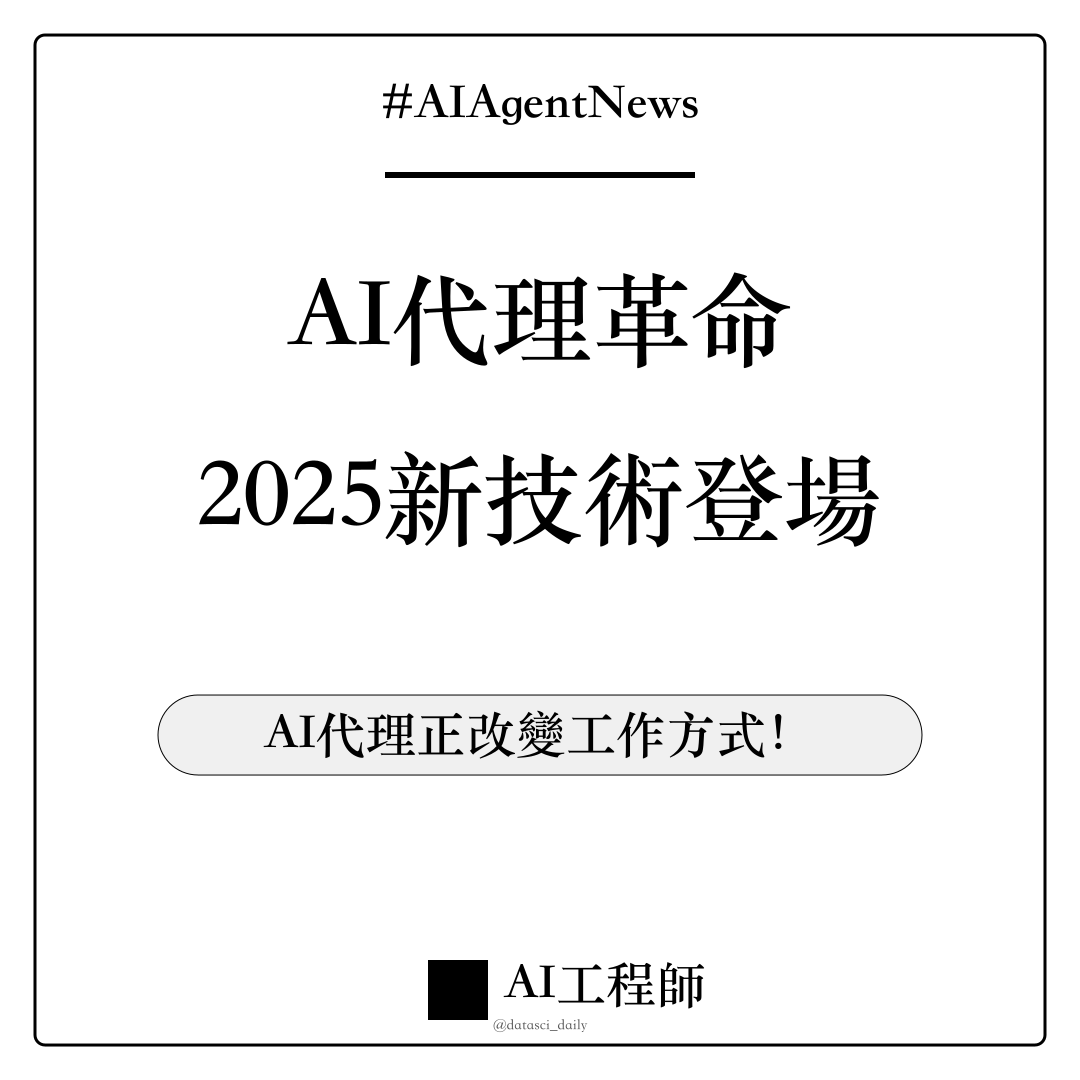

In [10]:
# # Display cover image
# cover_image = next(img for img in images if img['type'] == 'cover')
# print("Cover Image:")
# display(Image(cover_image['path']))

Cover Image:


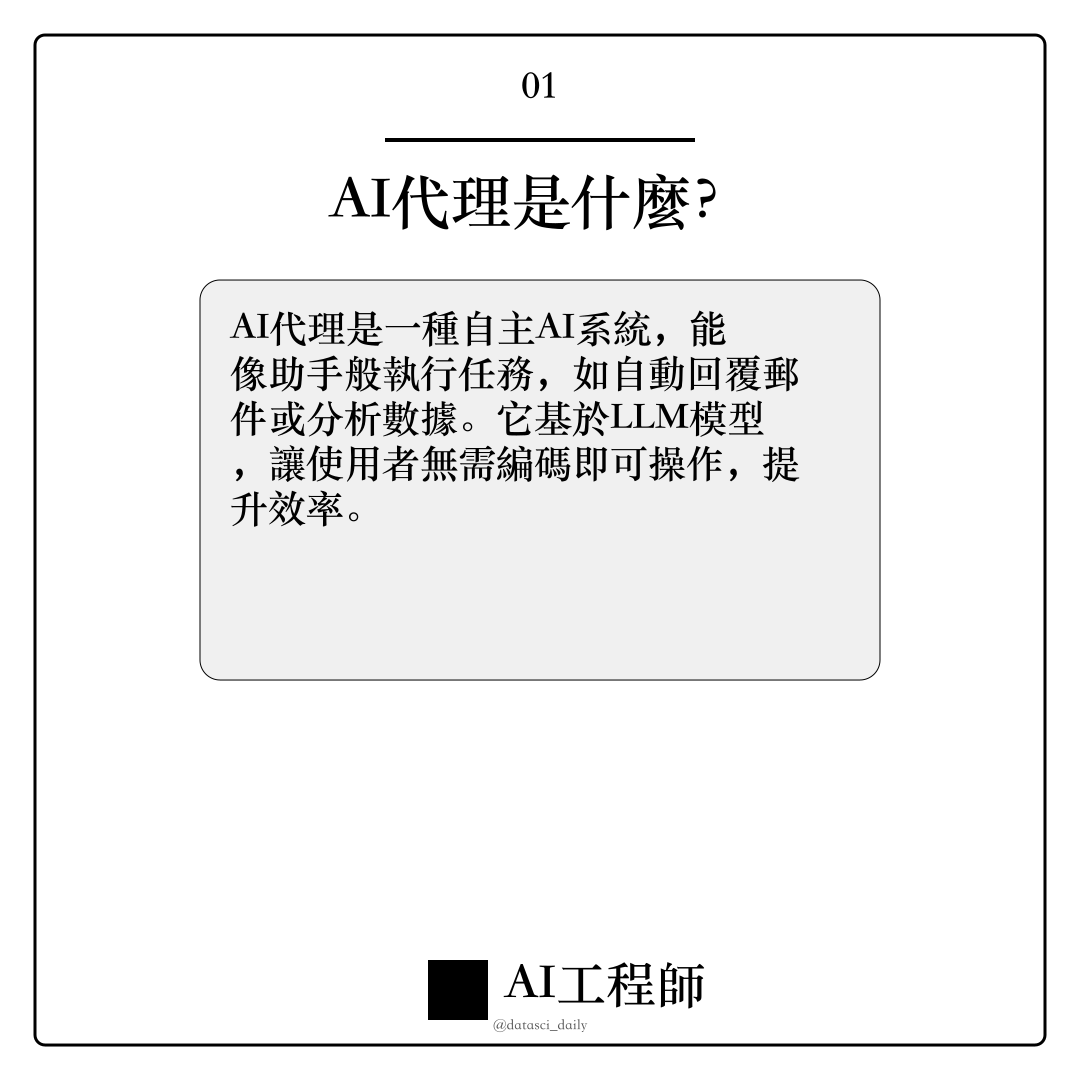

In [11]:
# # Display cover image
# cover_image = next(img for img in images if img['type'] != 'cover')
# print("Cover Image:")
# display(Image(cover_image['path']))

### 2.4 Send Notification (Optional)

If you've provided email credentials, you can send a notification with the generated content:

In [ ]:
# Send notification if credentials are available
if os.environ.get("EMAIL_USER") and os.environ.get("EMAIL_PASSWORD"):
    recipient_email = "your.email@example.com"  # Replace with your email
    notification_status = agent.send_notification(recipient_email)
    print(f"Notification sent: {notification_status['sent']}")
    if notification_status['sent']:
        print(f"Email sent to: {notification_status['recipient']}")
        print(f"Subject: {notification_status['subject']}")
else:
    print("Email credentials not available, skipping notification")

### 2.5 Post to Instagram (Optional)

If you've provided Instagram credentials, you can post the content to Instagram:

In [12]:
# Post to Instagram if credentials are available
if os.environ.get("INSTAGRAM_USERNAME") and os.environ.get("INSTAGRAM_PASSWORD"):
    # Using the updated post_to_instagram method that now accepts parameters
    instagram_status = agent.post_to_instagram()
    print(f"Posted to Instagram: {instagram_status['posted']}")
    if instagram_status['posted']:
        print(f"Post URL: {instagram_status.get('post_url', 'N/A')}")
else:
    print("Instagram credentials not available, skipping post")

2025-04-20 17:30:06,855 - ig_agent - INFO - Posting to Instagram
2025-04-20 17:30:06,859 - instagrapi - INFO - https://i.instagram.com/api/v1/launcher/sync/
2025-04-20 17:30:07,866 - private_request - INFO - datasci_daily [200] POST https://i.instagram.com/api/v1/launcher/sync/ (269.0.0.18.75, OnePlus 6T Dev)
2025-04-20 17:30:10,562 - instagrapi - INFO - https://i.instagram.com/api/v1/accounts/login/
2025-04-20 17:30:15,916 - private_request - INFO - datasci_daily [200] POST https://i.instagram.com/api/v1/accounts/login/ (269.0.0.18.75, OnePlus 6T Dev)
2025-04-20 17:30:16,927 - instagrapi - INFO - https://i.instagram.com/api/v1/feed/reels_tray/
2025-04-20 17:30:17,445 - private_request - INFO - datasci_daily [200] POST https://i.instagram.com/api/v1/feed/reels_tray/ (269.0.0.18.75, OnePlus 6T Dev)
2025-04-20 17:30:18,452 - instagrapi - INFO - https://i.instagram.com/api/v1/feed/timeline/
2025-04-20 17:30:20,701 - private_request - INFO - datasci_daily [200] POST https://i.instagram.com

Posted to Instagram: False


## 3. Using the LangGraph Pipeline

The Instagram Agent can also be used with a LangGraph pipeline, which provides a graph-based workflow with streaming intermediate results.

In [15]:
from ig_agent.pipeline import create_pipeline

# Create the pipeline
pipeline = create_pipeline(
    llm=llm,
    output_dir=output_dir,
    email_user=os.environ.get("EMAIL_USER"),
    email_password=os.environ.get("EMAIL_PASSWORD")
)

### 3.1 Visualize the Pipeline Graph

Let's visualize the pipeline graph to understand the workflow:

In [ ]:
# Try to visualize the pipeline graph
try:
    # Visualize the graph (requires graphviz)
    display(Image(pipeline.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Unable to visualize graph: {e}")
    print("Consider installing graphviz to visualize the graph")
    # Create a simple representation of the graph
    html = """
    <div style="border: 1px solid #ccc; padding: 10px;">
    <h3>Pipeline Graph</h3>
    <pre>
    START → supervisor → [ content_agent, image_agent, notification_agent ] → END
    
    Flow:
    1. The supervisor routes tasks to the appropriate agent
    2. Content agent generates content
    3. Image agent creates visuals
    4. Notification agent sends emails
    5. The supervisor determines when to finish
    </pre>
    </div>
    """
    display(HTML(html))

### 3.2 Run the Pipeline with Streaming

Run the pipeline with streaming to see the intermediate results:

In [ ]:
# Set up inputs for the pipeline
inputs = {
    "messages": [
        {
            "role": "user", 
            "content": "Generate a carousel post about Python data analysis libraries"
        }
    ]
}

# Process and display streaming results
for output in pipeline.stream(inputs):
    if "__end__" not in output:
        step = list(output.keys())[-1]
        print(f"\n--- Step: {step} ---")
        
        # Display agent messages
        if step == "supervisor":
            supervisor_output = output[step]
            if "next" in supervisor_output:
                print(f"Supervisor decision: Next agent = {supervisor_output['next']}")
        elif step == "content_agent":
            print(output[step]["messages"][-1].content)
            if "content_json" in output[step]:
                content_json = output[step]["content_json"]
                print(f"Generated content with {len(content_json.get('content_pages', []))} pages")
        elif step == "image_agent":
            print(output[step]["messages"][-1].content)
            if "images" in output[step]:
                images = output[step]["images"]
                print(f"Generated {len(images)} images")
        elif step == "notification_agent":
            print(output[step]["messages"][-1].content)
            if "notification_status" in output[step]:
                print(f"Notification status: {output[step]['notification_status']}")

print("\nPipeline execution completed.")

### 3.3 Display the Final Results

After the pipeline has completed, we can display the generated images:

In [ ]:
# Import glob to find the generated images
import glob

# Find the PNG files in the output directory
png_files = sorted(glob.glob(str(output_dir / "*.png")))

if png_files:
    print(f"Found {len(png_files)} images:")
    for img_path in png_files:
        print(f"\nImage: {os.path.basename(img_path)}")
        display(Image(img_path))
else:
    print("No images found in the output directory.")

## 4. Full Pipeline in One Go

You can also run the entire pipeline in one go using the `run_pipeline()` method:

In [ ]:
# # Create a new output directory for this run
# import datetime
# # We only need to specify a base directory now
# # DateTime subdirectories will be created automatically
# new_output_dir = Path(f"notebook_output_run")
# new_output_dir.mkdir(exist_ok=True)

# # Create a new agent instance
# new_agent = InstagramAgent(
#     llm=llm,
#     output_dir=new_output_dir,
#     email_user=os.environ.get("EMAIL_USER"),
#     email_password=os.environ.get("EMAIL_PASSWORD")
# )

# # Run the complete pipeline
# request = "Generate a carousel post about AI-powered data visualization techniques"
# recipient_email = "your.email@example.com"  # Replace with your email if needed

# # Run with or without notification based on credentials
# if os.environ.get("EMAIL_USER") and os.environ.get("EMAIL_PASSWORD"):
#     results = new_agent.run_pipeline(request, recipient_email=recipient_email)
# else:
#     results = new_agent.run_pipeline(request)

# # Display results summary
# print("Pipeline execution completed.")
# print(f"Output directory: {results['output_dir']}")
# print(f"Content pages: {len(results['content']['content_pages'])}")
# print(f"Images generated: {len(results['images'])}")
# if 'notification' in results:
#     print(f"Notification sent: {results['notification']['sent']}")

### 4.1 Display the Results from the Full Pipeline Run

In [ ]:
# # Display the images from the full pipeline run
# for img in results['images']:
#     print(f"\n{img['type'].capitalize()}{' ' + str(img['page_number']) if 'page_number' in img else ''}:")
#     display(Image(img['path']))

## 5. New Features

The `ig_agent` library includes several key features that improve its functionality:

1. **Content Line Breaks**: Content text is now broken into lines with approximately 18 words per line, making the text more readable on Instagram carousel posts.

2. **DateTime-based Output Directories**: Output files are now organized in a hierarchical directory structure:
   - Base directory (e.g., "notebook_output")
   - Date subfolder (e.g., "2025-04-20")
   - Timestamp subfolder (e.g., "20250420_154900")

This organization makes it easier to track and manage multiple content generation runs and preserves a history of generated content.

## 6. Summary

The `ig_agent` library provides a powerful multi-agent system for generating Instagram carousel posts. You can use it in several ways:

1. **Direct API**: Use the individual methods for fine-grained control over each step
2. **LangGraph Pipeline**: Use the graph-based workflow with streaming results
3. **One-step Pipeline**: Run the entire process in one go with `run_pipeline()`

The system generates structured content, converts it to visually appealing images using SVG templates, and optionally sends notifications or posts to Instagram.